# Практическая работа №3
## Разшильдяев А.М., ИКБО-03-21

### 1. Загрузим данные из файла "insurance.csv"

In [11]:
# all imports placed here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
df = pd.read_csv('./pr3_data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Посмотрим статистику по данным.

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Из показанного следует, что соличество записей - 1338, средние и медианные значения для возраста, индекса массы тела, количество детей примерно одинаковые (39, 30, 1 соответственно), а вот средние расходы (13270) значительно больше, чем медианные (9382).Это значит, что кто-то много тратит на лечение, что подтверждается максимальными расходами - она в 7 раз превышает медианную, и  далеко за пределами стандартного отклонения.

### 3. Посмотрем теперь на гистограммы для этих значений.

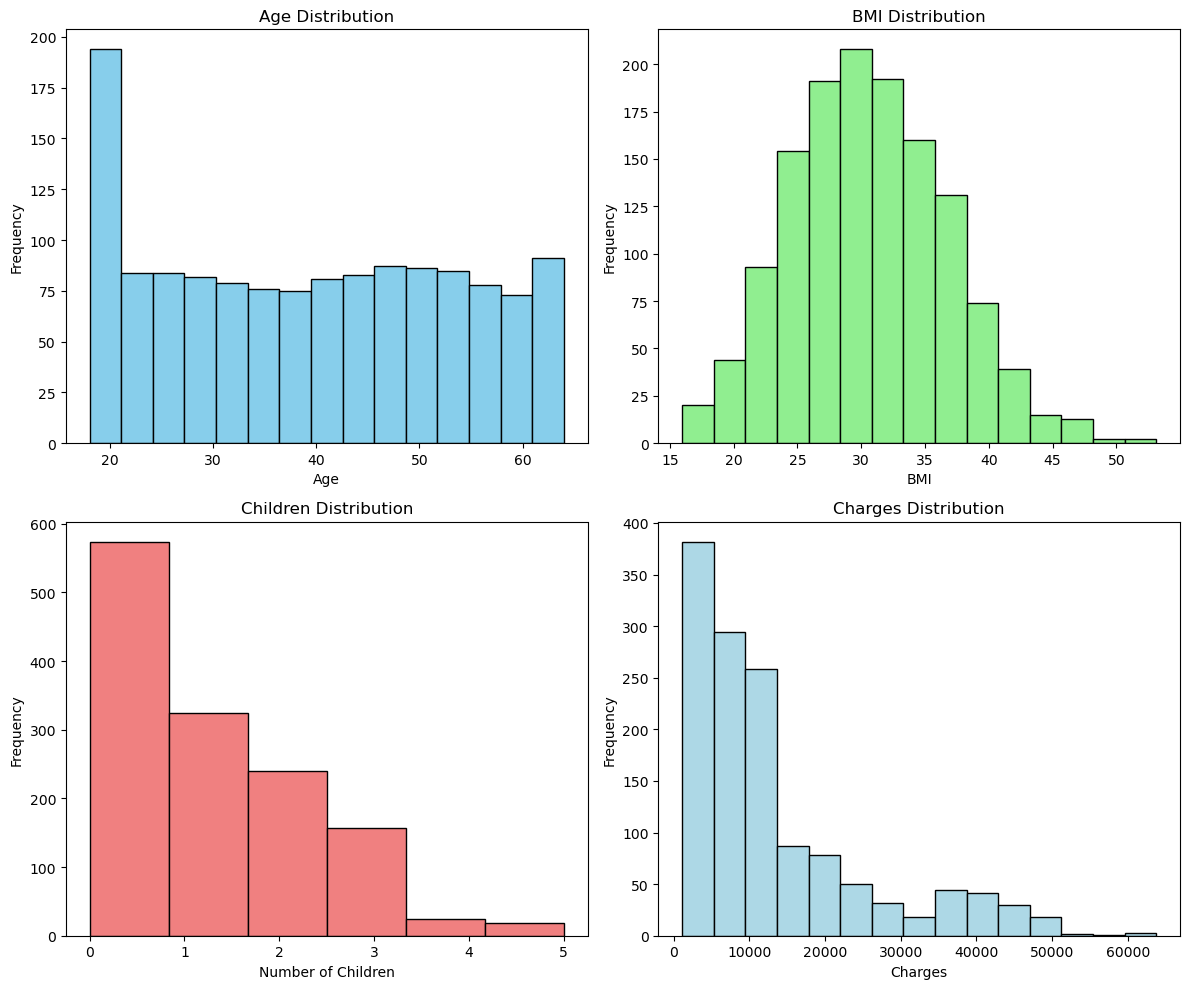

In [11]:
# Create histograms for age, bmi, children, and charges
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for Age
axes[0, 0].hist(df['age'], bins=15, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Histogram for BMI
axes[0, 1].hist(df['bmi'], bins=15, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

# Histogram for Children
axes[1, 0].hist(df['children'], bins=6, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Children Distribution')
axes[1, 0].set_xlabel('Number of Children')
axes[1, 0].set_ylabel('Frequency')

# Histogram for Charges
axes[1, 1].hist(df['charges'], bins=15, color='lightblue', edgecolor='black')
axes[1, 1].set_title('Charges Distribution')
axes[1, 1].set_xlabel('Charges')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Возраст:
Все промежутки возрастов представлены одинаковым количеством людей, около 76 человек в каждом промежутке. Исключением является первая возрастная группа, люди примерно до 22 лет. В нее попали чуть ли не 200 человек.

Индекс массы тела:
Большинство людей имеют индекс в районе 30, однако количество людей с более высоким имт больше, чем с меньшим.

Количество детей:
Чаще всего у людей либо нет детей, либо 1 ребенок. Однако большинство все-же имеют детей.

Расходы:
Подавляющее большинство людей имеют расходы меньше 15000. Большие расходы несут все меньшее количество людей. Однако эта последовательность нарушается при расходах около 35000, и начинает снова падать. Случаи расходов больше 50000 единичны, их немного.

### 4. Найдем среднее значение, медианное, моду, а также стандартное отклонение, дисперсию и размах для индекса массы тела и расходов.

In [6]:
bmi = df['bmi']
bmi_mean = np.mean(bmi)
bmi_mode = bmi.mode()
bmi_median = np.median(bmi)

bmi_std = np.std(bmi)
bmi_var = np.var(bmi)
bmi_range = np.max(bmi) - np.min(bmi)

In [8]:
charges = df['charges']
charges_mean = np.mean(charges)
charges_mode = charges.mode()
charges_median = np.median(charges)

charges_std = np.std(charges)
charges_var = np.var(charges)
charges_range = np.max(charges) - np.min(charges)

Выведем эти данные текстом.

In [17]:
print('BMI')
print(f'Mean: {bmi_mean}')
print(f'Median: {bmi_median}')
print(f'Mode: {bmi_mode}')
print(f'Standard Deviation: {bmi_std}')
print(f'Variance: {bmi_var}')
print(f'Range: {bmi_range}')

BMI
Mean: 30.66339686098655
Median: 30.4
Mode: 0    32.3
Name: bmi, dtype: float64
Standard Deviation: 6.095907641589428
Variance: 37.160089974788384
Range: 37.17


In [48]:
print('Charges')
print(f'Mean: {charges_mean}')
print(f'Median: {charges_median}')
print(f'Mode: {charges_mode}')
print(f'Standard Deviation: {charges_std}')
print(f'Variance: {charges_var}')
print(f'Range: {charges_range}')

Charges
Mean: 13270.422265141257
Median: 9382.033
Mode: 0    1639.5631
Name: charges, dtype: float64
Standard Deviation: 12105.484975561605
Variance: 146542766.49354774
Range: 62648.554110000005


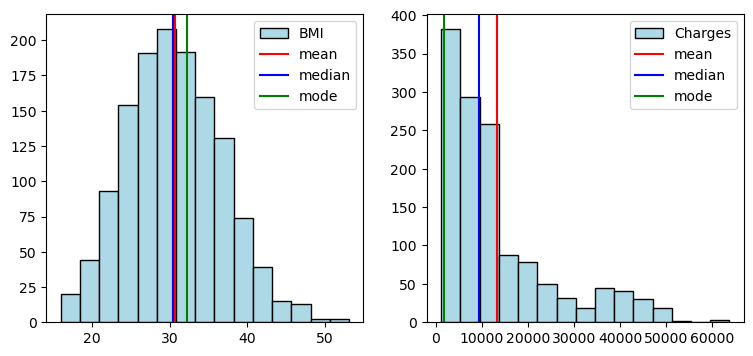

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))
ax[0].hist(bmi, edgecolor='black', color='lightblue', bins=15, label = 'BMI')
ax[0].axvline(x=bmi_mean, color='red', label='mean')
ax[0].axvline(x=bmi_median, color='blue', label='median')
ax[0].axvline(x=bmi_mode[0], color='green', label='mode')
ax[0].legend()

ax[1].hist(charges, edgecolor='black', color='lightblue', bins=15, label = 'Charges')
ax[1].axvline(x=charges_mean, color='red', label='mean')
ax[1].axvline(x=charges_median, color='blue', label='median')
ax[1].axvline(x=charges_mode[0], color='green', label='mode')
ax[1].legend()

Меры центральной тенденции в случае с индексом массы тела находятся приблизительно посередине, а у расходов смещено.

### 5. Построим box-plot для числовых показателей.

Text(0.5, 1.0, 'charges')

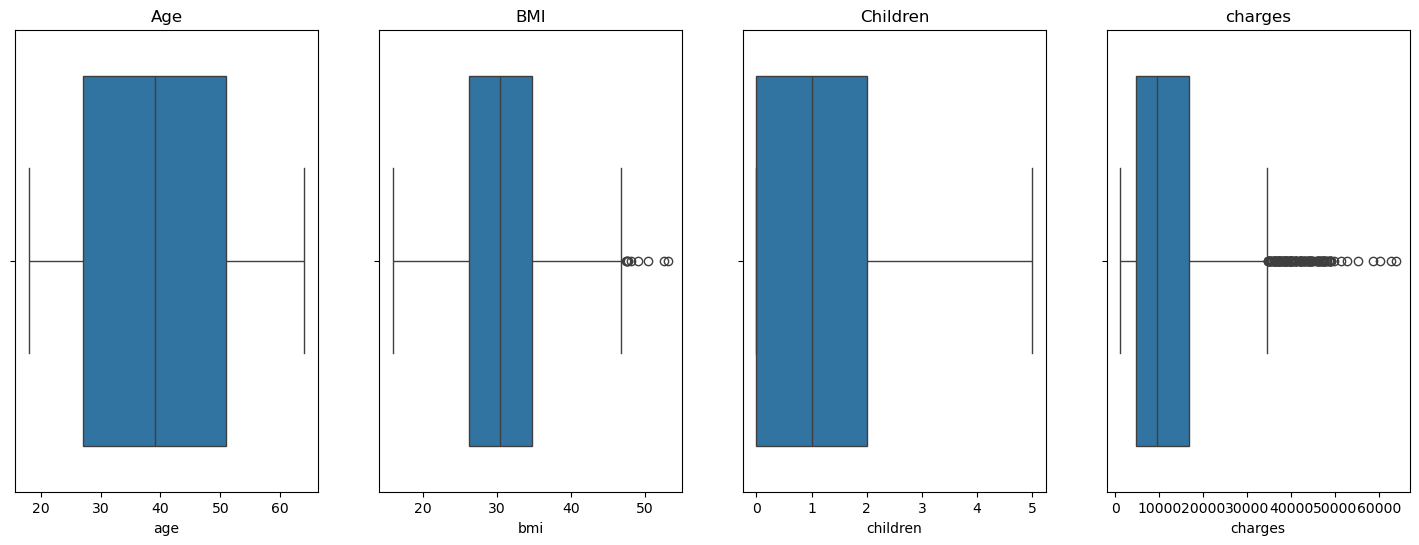

In [68]:
fig, ax = plt.subplots(1, 4, figsize=(18,6))

sns.boxplot(x=df['age'], ax=ax[0])
ax[0].set_title('Age')

sns.boxplot(x=df['bmi'], ax=ax[1])
ax[1].set_title('BMI')

sns.boxplot(x=df['children'], ax=ax[2])
ax[2].set_title('Children')

sns.boxplot(x=df['charges'], ax=ax[3])
ax[3].set_title('charges')

По возрасту распределились примерно поровну, без выбросов. Для ИМТ получились выбросы аномально высоких значений, что говорит нам о присутствии людей с ожирением. Количество детей получилось смещенным к нулю, однако без выбросов. Расходы смещены ближе к нулю, однако видно, что некоторые клиенты имеют аномально высокие расходы.

### 6. Проверим, выполняется ли центральная предельная теорема для расходов. Использованы различные длины выборок n. Количество выборок = 300.

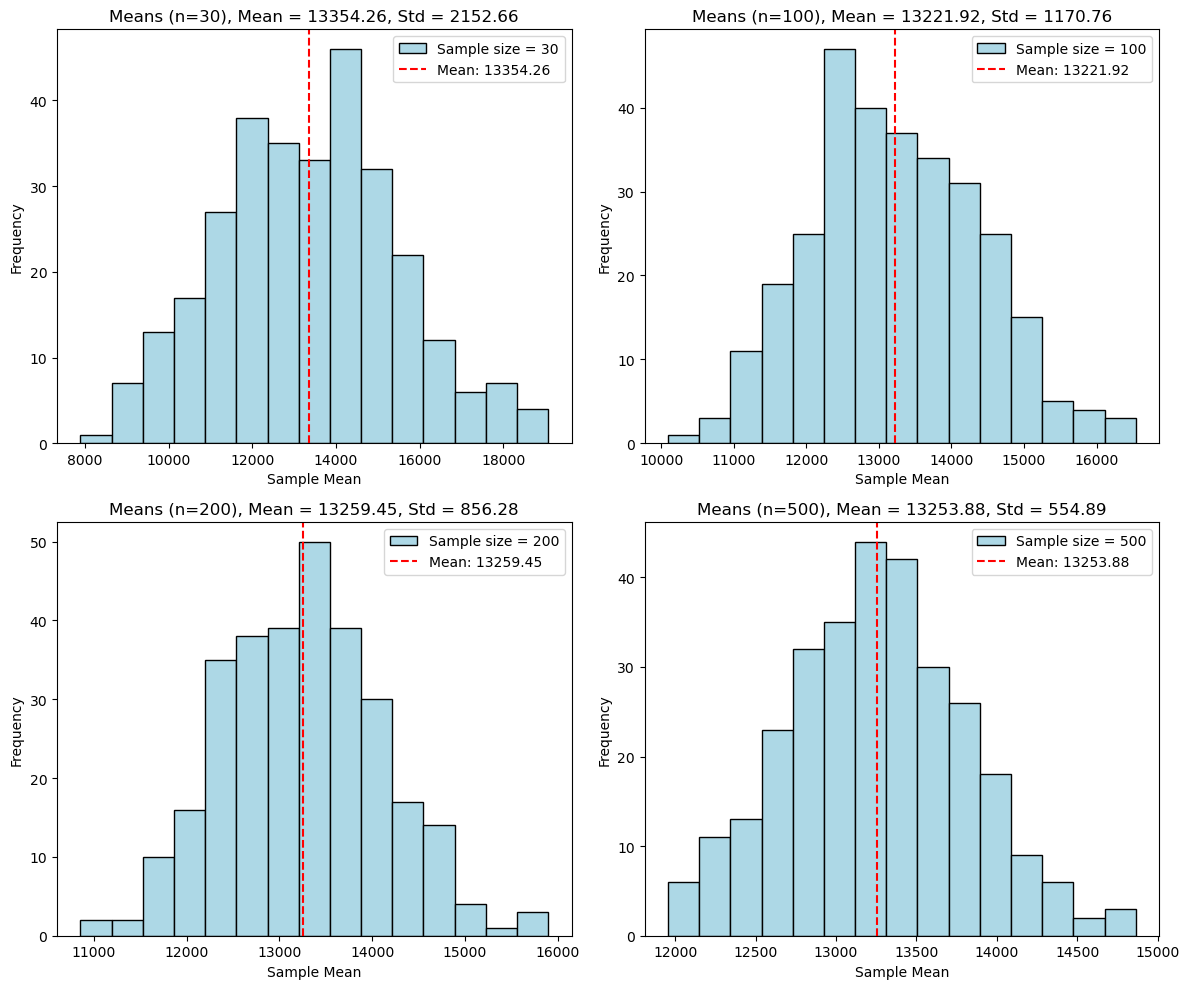

In [105]:
sample_sizes = [30, 100, 200, 500]
num_samples = 300
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.flatten()
    
for i, n in enumerate(sample_sizes):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(charges, size=n, replace=True)
        sample_means.append(np.mean(sample))

    # Построение гистограммы после сбора выборочных средних
    ax[i].hist(sample_means, bins=15, color='lightblue', edgecolor='black', label=f'Sample size = {n}')
        
    # Вычисление среднего и стандартного отклонения для выборочных средних
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means)
        
    # Добавление вертикальной линии для среднего
    ax[i].axvline(mean_of_means, color='red', linestyle='--', label=f'Mean: {mean_of_means:.2f}')
    
    # Добавление стандартного отклонения в заголовок графика
    ax[i].set_title(f'Means (n={n}), Mean = {mean_of_means:.2f}, Std = {std_of_means:.2f}')
    
    ax[i].set_xlabel('Sample Mean')
    ax[i].set_ylabel('Frequency')
    ax[i].legend()

plt.tight_layout()
plt.show()


Видно, что с увеличением длины выборок не меняется среднее для полученных значений, а вот стандартное отклонение увеньшается, и распределение выборочных средних становится все ближе к нормальному распределению, что подтверждает центральную предельную теорему.

Допустим, у нас есть некоторая генеральная совокупность с
распределением F. Из этой генеральной совокупности мы получаем N
выборок. Если для каждой такой выборки мы посчитаем выборочное среднее,
то распределение этих средних будет нормальным.

### 7. Построен 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела

Доверительный интервал – это интервал, в пределах которого с заданной
вероятностью лежат оценки некоторых статистических характеристик.

Если повторять эксперимент по построению интервала бесконечно, то в 100(1 − 𝛼)% случаев, этот интервал будет накрывать истинное значение 𝜃. Это называется 95 % доверительный интервал.
Мы на 95 % уверены, что такой интервал содержит среднее значение генеральной совокупности. 

Так же мы можем рассчитать 99% доверительный интервал, где нижняя граница = 𝑥̅ − 2.58 𝑆𝐸, верхняя граница 𝑥̅ + 2.58 𝑆𝐸, такой интервал будет шире.

In [121]:
se = bmi_std / len(df['bmi'])**(1/2)
l_95 = bmi_mean - 1.96*se
h_95 = bmi_mean + 1.96*se
l_99 = bmi_mean - 2.58*se
h_99 = bmi_mean + 2.58*se
print('BMI')
print(f'\t95% доверительный интервал: [{l_95}, {h_95}]')
print(f'\t99% доверительный интервал: [{l_99}, {h_99}]')

BMI
	95% доверительный интервал: [30.336759097652553, 30.990034624320543]
	99% доверительный интервал: [30.233434907210167, 31.09335881476293]


In [119]:
se = charges_std / len(df['charges'])**(1/2)
l_95 = charges_mean - 1.96*se
h_95 = charges_mean + 1.96*se
l_99 = charges_mean - 2.58*se
h_99 = charges_mean + 2.58*se
print('Charges')
print(f'\t95% доверительный интервал: [{l_95}, {h_95}]')
print(f'\t99% доверительный интервал: [{l_99}, {h_99}]')

Charges
	95% доверительный интервал: [12621.772585885332, 13919.071944397181]
	99% доверительный интервал: [12416.58748326356, 14124.257047018953]


### 8. Проверим на нормальность значения индекса массы тела и расходов.

In [23]:
loc, scale = stats.norm.fit(bmi)
test_sk = stats.kstest(bmi, stats.norm(loc=loc, scale=scale).cdf)
print(test_sk)

KstestResult(statistic=0.02613962682509635, pvalue=0.31453976932347394, statistic_location=28.975, statistic_sign=1)


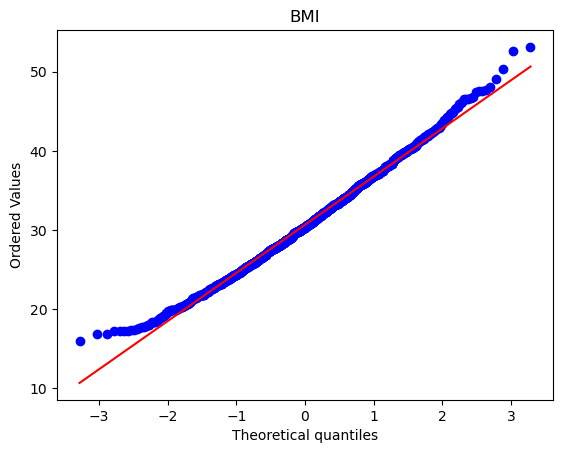

In [25]:
stats.probplot(bmi, dist="norm", plot=plt)
plt.title(label='BMI')
plt.show()

Нулевая гипотеза: Данные об индексе массы тела распределены нормально

Альтернативная гипотеза: Данные об индексе массы тела не следуют нормальному распределению

Поскольку p-value=0.0315 что больше 0.05, мы принимаем нулевую гипотезу. Данные распределены нормально.

In [27]:
loc, scale = stats.norm.fit(charges)
test_sk = stats.kstest(charges, stats.norm(loc=loc, scale=scale).cdf)
print(test_sk)

KstestResult(statistic=0.18846204110424236, pvalue=4.39305730768502e-42, statistic_location=13470.86, statistic_sign=1)


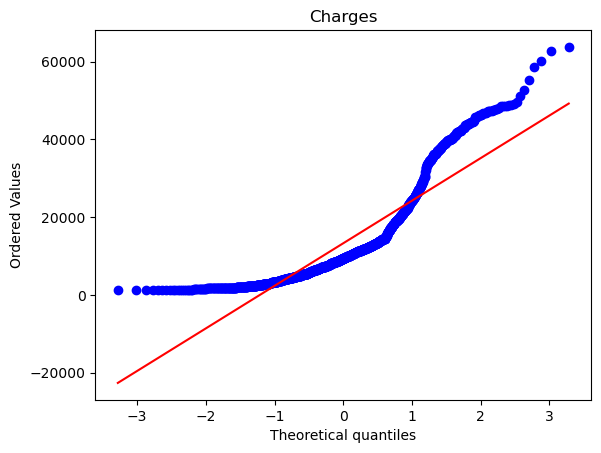

In [29]:
stats.probplot(charges, dist="norm", plot=plt)
plt.title(label='Charges')
plt.show()

Нулевая гипотеза: Данные о расходах распределены нормально

Альтернативная гипотеза: Данные о расходах не следуют нормальному распределению

Поскольку p-value гораздо меньше 0.05, мы принимаем принимаем альтернативную гипотезу. Данные не распределены нормально.


### 9. Загрузим данные из файла ECDCCases.csv

In [99]:
df2 = pd.read_csv('./pr3_data/ECDCCases.csv')
df2.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266


### 10. Проверим на наличие пропущенных значений

In [101]:
df2.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

Удалить топ 2 признака по пропущенным значениям

In [103]:
df2 = df2.drop('Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', axis=1)
df2 = df2.drop('geoId', axis=1)

Заменим остальные значения

In [105]:
df2['countryterritoryCode'] = df2['countryterritoryCode'].fillna('other')

temp = df2['popData2019'].median()
df2['popData2019'] = df2['popData2019'].fillna(temp)
print()

Убедимся, что пропуски пропали

In [107]:
df2.isna().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64

### 11. Посмотрим статистику по данным

In [113]:
df2.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09
